# 로이터 데이터셋을 이용한 Multi Class Classfication
* Activation Function = Input/Hidden Layer -> ReLU,  Output Layer -> Softmax
- Loss Function = Categorical Crossentropy
---
* 로이터에서 발행한 뉴스 기사를 46개의 주제로 분류하기 위해서 데이터셋을 학습 데이터와 테스트 데이터로 나누고 


In [2]:
# 로이터 데이터셋을 불러오고 학습용 데이터와 테스트 데이터 분류
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [3]:
# 데이터 형태 확인
print(train_data.shape)
print(test_data.shape)

(8982,)
(2246,)


In [4]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [5]:
# results라는 배열을 만들어 데이터에서 글자가 있는 데이터를 벡터로 변환하는 과정을 함수로 만들기
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))

  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1

  return results

In [6]:
# 학습용 데이터와 테스트 데이터의 벡터 변환
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
# 라벨 데이터를 카테고리 데이터로 전환
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [8]:
# 모델(신경망) 구성
# Dense layer를 추가해주는데 유닛의 개수는 64개, 출력층에는 출력 결과가 46개이기 때문에 46개의 유닛 지정
# 입력 데이터의 형태는 10000개 column의 배열 형태로 지정
# 출력 결과는 46개의 벡터 중 하나가 선택이 된다. 
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [9]:
# Model Compile
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
# 데이터를 쪼개서 학습, 검증, 시험용 데이터 만들기
# 검증용 데이터는 1000건 정도만 사용계획
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [11]:
# 모델 학습시키기, 실행결과는 변수에 저장
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=1024, validation_data=(x_val, y_val))

Epoch 1/20
8/8 [==============================] - 3s 262ms/step - loss: 3.2210 - accuracy: 0.4406 - val_loss: 2.4445 - val_accuracy: 0.5570
Epoch 2/20
8/8 [==============================] - 2s 240ms/step - loss: 2.0851 - accuracy: 0.6159 - val_loss: 1.8205 - val_accuracy: 0.6230
Epoch 3/20
8/8 [==============================] - 1s 131ms/step - loss: 1.6080 - accuracy: 0.6749 - val_loss: 1.5166 - val_accuracy: 0.6640
Epoch 4/20
8/8 [==============================] - 1s 129ms/step - loss: 1.3495 - accuracy: 0.7080 - val_loss: 1.3472 - val_accuracy: 0.7080
Epoch 5/20
8/8 [==============================] - 1s 117ms/step - loss: 1.1617 - accuracy: 0.7507 - val_loss: 1.2292 - val_accuracy: 0.7260
Epoch 6/20
8/8 [==============================] - 1s 113ms/step - loss: 1.0252 - accuracy: 0.7840 - val_loss: 1.1567 - val_accuracy: 0.7460
Epoch 7/20
8/8 [==============================] - 1s 126ms/step - loss: 0.9189 - accuracy: 0.8036 - val_loss: 1.0938 - val_accuracy: 0.7660
Epoch 8/20
8/8 [====

In [12]:
# 시각화
import matplotlib.pyplot as plt

loss = history.history['loss']
acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

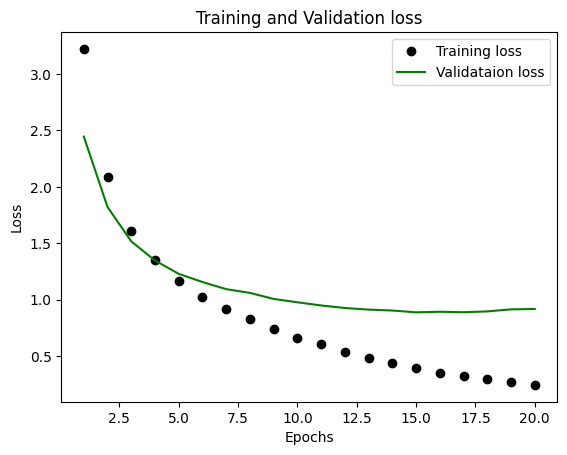

In [13]:
# Loss Graph
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'ko', label='Training loss')
plt.plot(epochs, val_loss, 'g-', label='Validataion loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

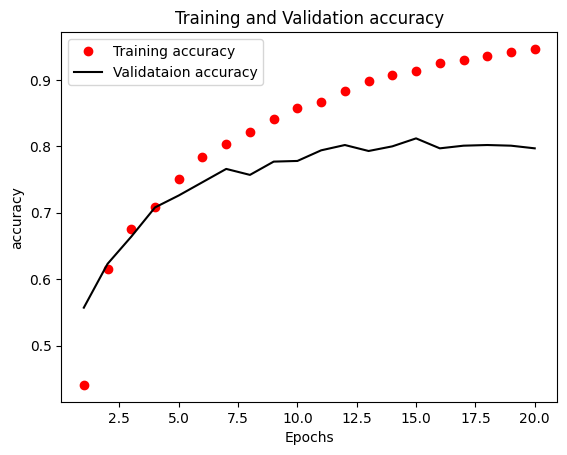

In [14]:
# Accuracy graph
plt.plot(epochs, acc, 'ro', label='Training accuracy')
plt.plot(epochs, val_acc, 'k-', label='Validataion accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()

In [15]:
# 신경망(모델) 재구성 후 검증된 결과를 바탕으로 재학습
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=1024, validation_data=(x_val, y_val))

eval_result = model.evaluate(x_test, one_hot_test_labels)
eval_loss = eval_result[0]
eval_acc = eval_result[1]

print('-------------------------------------')
print('Evaluate Loss : {0:.4f}, Evaluate Accuracy : {1:.4f}'.format(eval_loss, eval_acc))

Epoch 1/9
8/8 [==============================] - 3s 242ms/step - loss: 3.3431 - accuracy: 0.3077 - val_loss: 2.6524 - val_accuracy: 0.4960
Epoch 2/9
8/8 [==============================] - 1s 140ms/step - loss: 2.2272 - accuracy: 0.5778 - val_loss: 1.8688 - val_accuracy: 0.6290
Epoch 3/9
8/8 [==============================] - 1s 133ms/step - loss: 1.6402 - accuracy: 0.6728 - val_loss: 1.5260 - val_accuracy: 0.6790
Epoch 4/9
8/8 [==============================] - 1s 128ms/step - loss: 1.3449 - accuracy: 0.7150 - val_loss: 1.3346 - val_accuracy: 0.7080
Epoch 5/9
8/8 [==============================] - 1s 130ms/step - loss: 1.1574 - accuracy: 0.7493 - val_loss: 1.2196 - val_accuracy: 0.7240
Epoch 6/9
8/8 [==============================] - 1s 119ms/step - loss: 1.0235 - accuracy: 0.7730 - val_loss: 1.1358 - val_accuracy: 0.7490
Epoch 7/9
8/8 [==============================] - 1s 119ms/step - loss: 0.9009 - accuracy: 0.8038 - val_loss: 1.0829 - val_accuracy: 0.7610
Epoch 8/9
8/8 [============

# Boston Housing K-fold validation and Regression
* 데이터 양이 얼마 없을 때 폴드 별로 전체 데이터를 검증, 학습용 데이터로 번갈아가며 나누어서 반복학습한다.
- 데이터를 바꿔가며 반복학습하기 때문에 학습 전에 신경망을 초기화해주는 작업이 필요하다.

In [16]:
from keras.datasets import boston_housing
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [17]:
# 데이터의 모양을 확인
print(train_data.shape)
print(test_data.shape)

(404, 13)
(102, 13)


In [18]:
print(train_data[0])

[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]


In [19]:
print(train_labels[0])

15.2


In [32]:
# 데이터 전처리 (함수 이용x, 직접 스케일링) (스케일링(standard scaling))
# 표준편차나 이런 지표들을 확인하기위해서 전체 데이터를 확인하는 과정이 필요함
# 학습용 데이터 전체의 평균값을 확인하고
# 0번축을 기준으로 각 Column의 평균치를 뽑아내기
mean = train_data.mean(axis=0)

# 학습용 데이터 전체에서 평균치를 빼기
train_data -= mean   # train_data = train_data - mean 과 같은 식

# 표준편차 구하기(각 Column별로=(axis=0))
std = train_data.std(axis=0)

# 학습용 데이터를 표준편차로 나누기
train_data /= std

train_data[0]

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

In [33]:
# 모델 구성
from keras import models
from keras import layers

def build_model():              # 호출할 때마다 모델을 동작하는 함수 정의 
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1], )))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))     # Regression 문제는 활성화 함수를 항등함수를 쓰기 때문에 함수 지정을 해주지 않아도 된다.

  # Mean Squared Error를 손실 함수 지정
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])
  return model           

In [37]:
# K-Fold Validation
import numpy as np
# fold를 몇 개로 나눌 건지 지정
k = 4
num_val_samples = len(train_data) // k   # 한 folder의 데이터 수를 지정
all_scores = []                                    # 리스트 객체

for i in range(k):
  print('처리중인 폴드 #', i)

  # 처리할 데이터를 뽑아내는 작업
  # 검증 데이터 준비
  val_data = train_data[i * num_val_samples:(i + 1) * num_val_samples]
  val_labels = train_labels[i * num_val_samples:(i + 1) * num_val_samples]

  # 학습 데이터 준비
  data1 = train_data[:i * num_val_samples]
  data2 = train_data[(i + 1) * num_val_samples:]
  data1_labels = train_labels[:i * num_val_samples]
  data2_labels = train_labels[(i + 1) * num_val_samples:]

  partial_train_data = np.concatenate([data1, data2], axis=0)
  partial_train_labels = np.concatenate([data1_labels, data2_labels], axis=0)

  # 위에서 만들었던 함수를 호출하여 모델 불러오기
  model = build_model()
  model.summary()
  # 모델 학습
  # verbose=0 옵션으로 진행상황 미출력
  model.fit(partial_train_data, partial_train_labels, epochs=500, batch_size=128, verbose=0)

  # 모델 검증(평균제곱오차, 평균절대오차)
  val_mse, val_mae = model.evaluate(val_data, val_labels)
  print('Validation Mean Squared Error : {0:.4f}, Validation Mean Absolute Error : {1:.4f}'.format(val_mse, val_mae))
  # 결과 저장
  all_scores.append(val_mae)

처리중인 폴드 # 0
Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_105 (Dense)           (None, 64)                896       
                                                                 
 dense_106 (Dense)           (None, 64)                4160      
                                                                 
 dense_107 (Dense)           (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
4/4 [==============================] - 0s 5ms/step - loss: 7.1031 - mse: 7.1031
Validation Mean Squared Error : 7.1031, Validation Mean Absolute Error : 7.1031
처리중인 폴드 # 1
Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape 

In [38]:
# 평균 오차 확인
np.mean(all_scores)

10.448184967041016

# CNN(Convolutional Neural Network): 합성곱 신경망
* 이미지를 인식하기위한 패턴을 찾는데 유용하다.

In [39]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(2, 2))

In [40]:
model.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 32)          9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 32)       

In [41]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [42]:
model.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 32)          9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 32)       

In [43]:
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 데이터 스케일링
train_data = train_images.reshape((60000, 28, 28, 1))
train_data = train_data.astype('float32') / 255

test_data = test_images.reshape((10000, 28, 28, 1))
test_data = test_images.astype('float32') / 255

train_target = to_categorical(train_labels)
test_target = to_categorical(test_labels)

11490434/11490434 [==============================] - 0s 0us/step


In [44]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_data, train_target, epochs=5, batch_size=256)

Epoch 1/5
235/235 [==============================] - 49s 200ms/step - loss: 0.7129 - accuracy: 0.7790
Epoch 2/5
235/235 [==============================] - 45s 191ms/step - loss: 0.2111 - accuracy: 0.9355
Epoch 3/5
235/235 [==============================] - 44s 189ms/step - loss: 0.1365 - accuracy: 0.9585
Epoch 4/5
235/235 [==============================] - 42s 181ms/step - loss: 0.1006 - accuracy: 0.9693
Epoch 5/5
235/235 [==============================] - 43s 184ms/step - loss: 0.0826 - accuracy: 0.9743


In [45]:
# 평가
test_loss, test_acc = model.evaluate(test_data, test_target)

313/313 [==============================] - 3s 10ms/step - loss: 0.1129 - accuracy: 0.9652
